**Titanic DataSet predicting who survived using SVM, DecisionTree, RandomForest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [ ]:
df_train=pd.read_csv('train.csv')
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test=pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


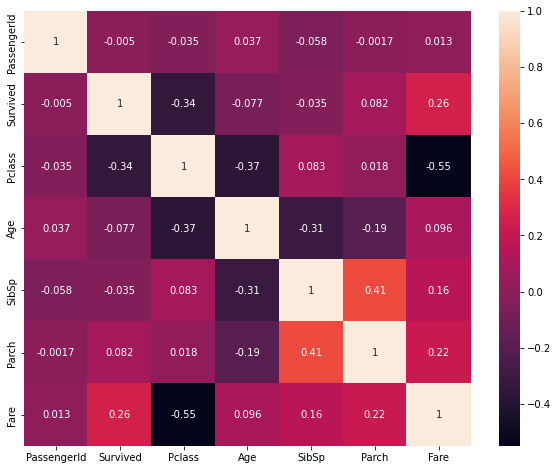

In [ ]:
cor=df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.show()

**DATA CLEANING**

In [ ]:
df_train=df_train.drop(['Name','SibSp','Parch','Cabin','Embarked','Ticket'],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [ ]:
df_test=df_test.drop(['Name','SibSp','Parch','Cabin','Embarked','Ticket'],axis=1)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875


In [ ]:
df_train.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Fare             0
Age            177
dtype: int64

In [ ]:
df_test.isna().sum().sort_values()

PassengerId     0
Pclass          0
Sex             0
Fare            1
Age            86
dtype: int64

In [ ]:
m=df_train.Age.mean()
df_train.Age=df_train.Age.fillna(m)
df_train

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.000000,7.2500
1,2,1,1,female,38.000000,71.2833
2,3,1,3,female,26.000000,7.9250
3,4,1,1,female,35.000000,53.1000
4,5,0,3,male,35.000000,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000
887,888,1,1,female,19.000000,30.0000
888,889,0,3,female,29.699118,23.4500
889,890,1,1,male,26.000000,30.0000


In [ ]:
df_train.isna().sum().sort_values()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [ ]:
mtest=df_test.Age.mean()
ftest=df_test.Fare.mean()
df_test.Age=df_test.Age.fillna(mtest)
df_test.Fare=df_test.Fare.fillna(ftest)
df_test

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.50000,7.8292
1,893,3,female,47.00000,7.0000
2,894,2,male,62.00000,9.6875
3,895,3,male,27.00000,8.6625
4,896,3,female,22.00000,12.2875
...,...,...,...,...,...
413,1305,3,male,30.27259,8.0500
414,1306,1,female,39.00000,108.9000
415,1307,3,male,38.50000,7.2500
416,1308,3,male,30.27259,8.0500


In [ ]:
df_test.isna().sum().sort_values()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [ ]:
df_train.Sex=np.where(df_train.Sex=='male',1,0)

# label=LabelEncoder()
# df_train_Sex=label.fit_transform(df_train.Sex)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.0,7.2500
1,2,1,1,0,38.0,71.2833
2,3,1,3,0,26.0,7.9250
3,4,1,1,0,35.0,53.1000
4,5,0,3,1,35.0,8.0500


In [ ]:
df_train.Sex.dtype

dtype('int64')

In [ ]:
df_test.Sex=np.where(df_test.Sex=='male',1,0)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,1,34.5,7.8292
1,893,3,0,47.0,7.0000
2,894,2,1,62.0,9.6875
3,895,3,1,27.0,8.6625
4,896,3,0,22.0,12.2875


In [ ]:
df_test.Sex.dtype

dtype('int64')

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

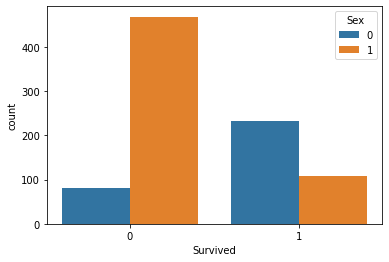

In [ ]:
sns.countplot('Survived',data=df_train,hue='Sex')
plt.plot()

In [ ]:
x=df_train.drop('Survived',axis=1).values
y=df_train.Survived



**DECISION TREE**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dtp=dt.predict(df_test)
dt.score(x,y)

# kf=KFold(n_splits=6,shuffle=True)
# cv=cross_val_score(dt,x,y,cv=kf)
# max(cv)
# ypred=dt.predict(df_test.values)
# ypred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0

In [ ]:
dtp

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
dt_Df=pd.DataFrame({'PassengerId':df_test.PassengerId,
                     'Survived':dtp})
dt_Df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
dt_Df.to_csv('Submission.csv',index=False)

**SUPPORT VECTOR MACHINE**

In [ ]:
svm=SVC(C=0.01,kernel='linear')
svm.fit(x,y)
p=svm.predict(df_test)
svm.score(x,y)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7946127946127947

In [ ]:
p

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
svm_Df=pd.DataFrame({'PassengerId':df_test.PassengerId,
                     'Survived':p})
svm_Df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier()
rf.fit(x,y)
rp=rf.predict(df_test)
rf.score(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0

In [ ]:
rp

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
rf_Df=pd.DataFrame({'PassengerId':df_test.PassengerId,
                     'Survived':rp})
rf_Df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
rf_Df.to_csv('submission.csv',index=False)